# K-Means Clustering  (silhouette_score, Best sub-model, Elbow method, 3D plot)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import copy

## Importing the dataset, convert cat to num

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dums = dataset['Genre']
dums = pd.get_dummies(dums)
dums

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
195,1,0
196,1,0
197,0,1
198,0,1


In [3]:
dataset = dataset.drop('Genre', axis=1)
dataset = dataset.assign(male=dums['Male'], female=dums['Female'])
dataset

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),male,female
0,1,19,15,39,1,0
1,2,21,15,81,1,0
2,3,20,16,6,0,1
3,4,23,16,77,0,1
4,5,31,17,40,0,1
...,...,...,...,...,...,...
195,196,35,120,79,0,1
196,197,45,126,28,0,1
197,198,32,126,74,1,0
198,199,32,137,18,1,0


## Create feature_combinations and pick the best sub-model

In [4]:

df_ = copy.deepcopy(dataset)
features = df_.columns.tolist()

# Step 2: Perform K-means clustering using different combinations of three features

best_features = None
best_score = -1

# Generate all combinations of three features
feature_combinations = list(combinations(features, 3))


selected_features are: ['CustomerID', 'Age', 'Annual Income (k$)'] and score is: 0.49405874226585367



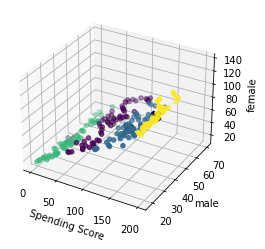

selected_features are: ['CustomerID', 'Age', 'Spending Score (1-100)'] and score is: 0.3644714556852635



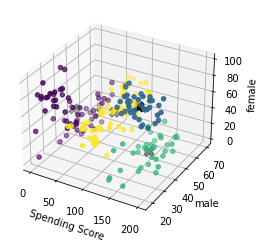

selected_features are: ['CustomerID', 'Age', 'male'] and score is: 0.4969416472862791



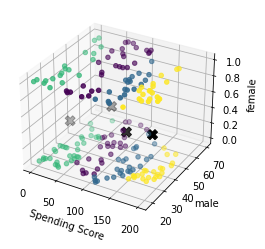

selected_features are: ['CustomerID', 'Age', 'female'] and score is: 0.4969416472862791



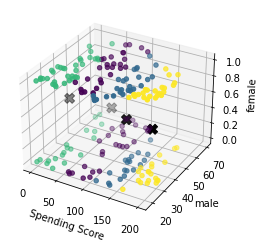

selected_features are: ['CustomerID', 'Annual Income (k$)', 'Spending Score (1-100)'] and score is: 0.41438092427286827



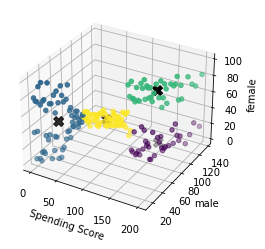

selected_features are: ['CustomerID', 'Annual Income (k$)', 'male'] and score is: 0.5658310409022524



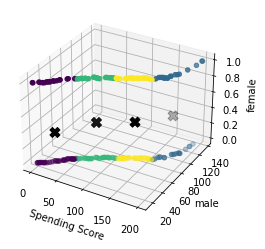

selected_features are: ['CustomerID', 'Annual Income (k$)', 'female'] and score is: 0.5658310409022524



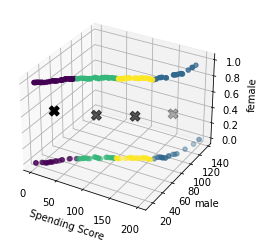

selected_features are: ['CustomerID', 'Spending Score (1-100)', 'male'] and score is: 0.40845862571319086



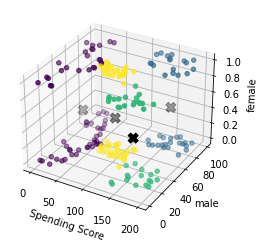

selected_features are: ['CustomerID', 'Spending Score (1-100)', 'female'] and score is: 0.40845862571319086



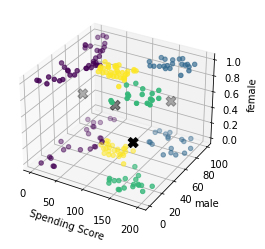

selected_features are: ['CustomerID', 'male', 'female'] and score is: 0.5833491651049749



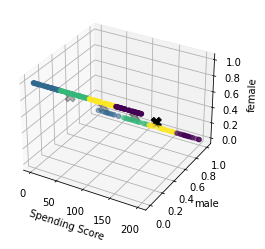

selected_features are: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'] and score is: 0.3839349967742105



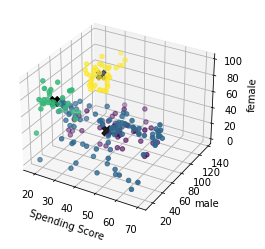

selected_features are: ['Age', 'Annual Income (k$)', 'male'] and score is: 0.4250534215103805



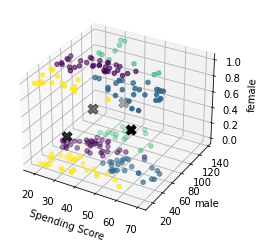

selected_features are: ['Age', 'Annual Income (k$)', 'female'] and score is: 0.4250534215103805



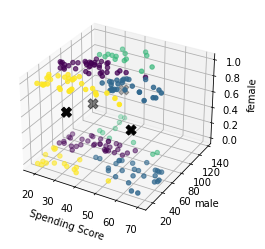

selected_features are: ['Age', 'Spending Score (1-100)', 'male'] and score is: 0.45254295521474774



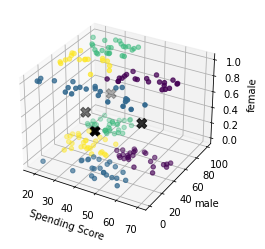

selected_features are: ['Age', 'Spending Score (1-100)', 'female'] and score is: 0.45254295521474774



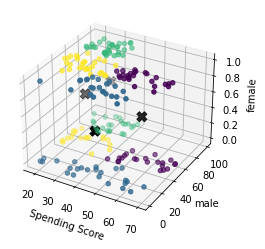

selected_features are: ['Age', 'male', 'female'] and score is: 0.5378930904845718



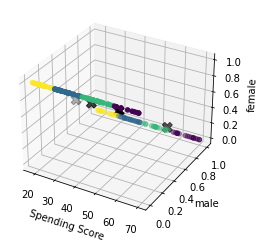

selected_features are: ['Annual Income (k$)', 'Spending Score (1-100)', 'male'] and score is: 0.46733000902034116



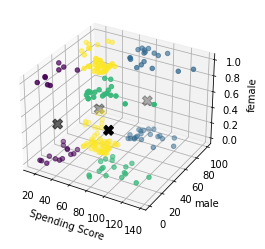

selected_features are: ['Annual Income (k$)', 'Spending Score (1-100)', 'female'] and score is: 0.46733000902034116



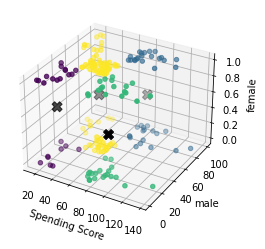

selected_features are: ['Annual Income (k$)', 'male', 'female'] and score is: 0.5592740217860456



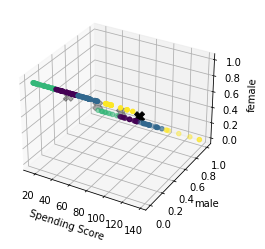

selected_features are: ['Spending Score (1-100)', 'male', 'female'] and score is: 0.6505092683888907



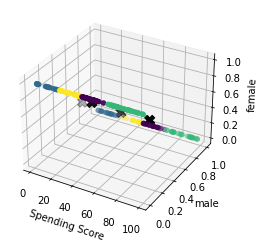

In [5]:
for feature_set in feature_combinations:
    # Extract the three features from the dataframe
    selected_features = list(feature_set)
    data = df_[selected_features].values

    # Perform K-means clustering
    k = 3  # Number of clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)

    # Evaluate clustering performance using silhouette score
    labels = kmeans.labels_
    score = silhouette_score(data, labels)
    
    print(f'selected_features are: {selected_features} and score is: {score}\n')
    
    X = df_[selected_features]
    X = X.values
    
    kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
    y_kmeans = kmeans.fit_predict(X)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot for each data point colored by their cluster label
    ax.scatter(X[:, -3], X[:, -2], X[:, -1], c=kmeans.labels_, cmap='viridis')
    ax.scatter(kmeans.cluster_centers_[:, -3],kmeans.cluster_centers_[:, -2], kmeans.cluster_centers_[:, -1],
        c='black',
        s=100,
        marker='X'
    )

    # Set labels for the axes
    ax.set_xlabel('Spending Score')
    ax.set_ylabel('male')
    ax.set_zlabel('female')

    # Step 6: Show the plot
    plt.show()
    
    if score > best_score:
        best_score = score
        best_features = selected_features
    
   


## Using the elbow method to find the optimal number of clusters

In [6]:
# from sklearn.cluster import KMeans
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
#     kmeans.fit(X)
#     print(f'the kmeans.inertia_ of {i} is: {kmeans.inertia_}')
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1, 11), wcss)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

In [7]:
 
#Print the best features that yield the highest clustering performance
print("Best features:", best_features)
print("Best silhouette score:", best_score)


Best features: ['Spending Score (1-100)', 'male', 'female']
Best silhouette score: 0.6505092683888907
